In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import hvplot.pandas

# Study data files
tesla_acc = "data/Tesla Deaths - Deaths_2.csv"

# Read the Telsa_accidents data
tesla_data = pd.read_csv(tesla_acc)

In [26]:
tesla_data

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,296,2022,1/30/2023,USA,MO,Speeding Tesla crashes into car,1,-,-,1,...,-,-,https://web.archive.org/web/20230130231416/ht...,https://web.archive.org/web/20230130231416/ht...,https://web.archive.org/web/20230130231416/ht...,NaN,NaN,NaN,NaN,NaN
1,295,2022,1/21/2023,USA,CA,Tesla crashses into resident's pool,1,1,-,-,...,-,-,https://archive.is/r4ida,https://archive.is/r4ida,https://archive.is/r4ida,NaN,NaN,NaN,NaN,NaN
2,294,2022,1/17/2023,USA,CA,Tesla crashes into back of semi,1,1,-,-,...,-,-,NaN,NaN,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
3,293,2022,01/07/23,Canada,-,Tesla crashes,1,1,-,-,...,-,-,NaN,NaN,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
4,292,2022,01/07/23,USA,WA,"Tesla hits pole, catches on fire",1,-,1,-,...,-,-,NaN,NaN,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,5,2014,7/14/2014,USA,CA,Tesla kills motorcyclist,1,-,-,1,...,-,-,https://web.archive.org/web/20220817120807/ht...,https://web.archive.org/web/20220817120807/ht...,https://web.archive.org/web/20220817120807/ht...,NaN,NaN,NaN,NaN,NaN
292,4,2014,07/04/14,USA,CA,Thief crashes stolen Tesla,1,1,-,-,...,-,-,https://web.archive.org/web/20220817120839/ht...,https://web.archive.org/web/20220817120839/ht...,https://web.archive.org/web/20220817120839/ht...,NaN,Joshua Slot,NaN,NaN,NaN
293,3,2014,07/04/14,USA,CA,Tesla rear ends stopped car,3,-,-,3,...,-,-,https://web.archive.org/web/20220412004559/ht...,https://web.archive.org/web/20220412004559/ht...,https://web.archive.org/web/20220412004559/ht...,NaN,NaN,NaN,NaN,NaN
294,2,2013,11/02/13,USA,CA,Tesla kills cyclist,1,-,-,-,...,-,-,https://web.archive.org/web/20220817121049/ht...,https://web.archive.org/web/20220817121049/ht...,https://web.archive.org/web/20220817121049/ht...,NaN,NaN,NaN,NaN,NaN


In [27]:
# Número de muertes totales
print('The number of people that have died due to accidents with Tesla cars involved are: ' 
      + str(tesla_data[' Deaths '].sum()))

The number of people that have died due to accidents with Tesla cars involved are: 355


In [28]:
#Top 5: Countries with more deaths
d_by_country = tesla_data.groupby(' Country ')[' Deaths '].count().sort_values(ascending=False)
d_by_country.head()

 Country 
 USA             217
 China            16
 Germany          11
 Canada           10
 Netherlands       6
Name:  Deaths , dtype: int64

In [29]:
#List of countries rating by deaths
sor = tesla_data.groupby(' Country ')[' Deaths '].count().sort_values(ascending=False)
sor

 Country 
 USA             217
 China            16
 Germany          11
 Canada           10
 Netherlands       6
 UK                5
 Norway            4
 Holland           3
 Taiwan            3
 Switzerland       3
 Australia         2
 Belgium           2
 Denmark           2
 France            2
 Japan             2
 Spain             1
 Mexico            1
 South Korea       1
 Slovenia          1
 Portugal          1
 Austria           1
 Finland           1
 Ukraine           1
Name:  Deaths , dtype: int64

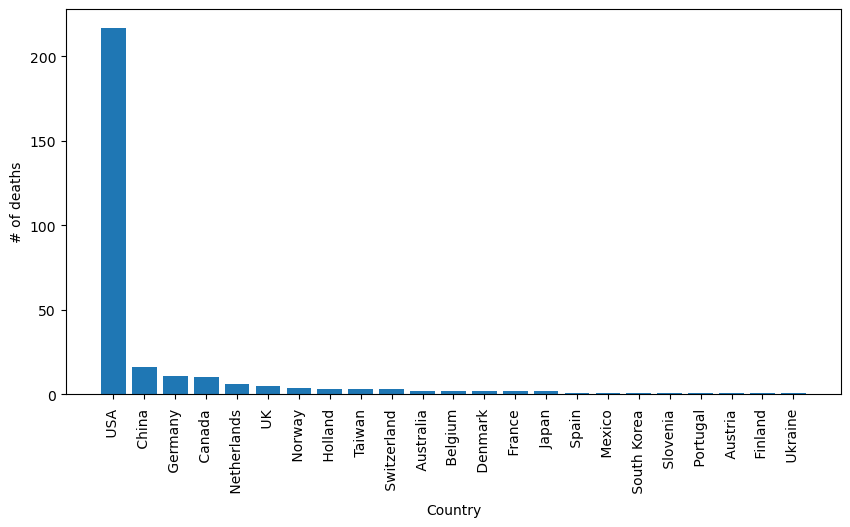

In [30]:
# Graph of countries vs deaths #1
plt.figure(figsize=(10,5))
plt.bar(
    tesla_data.groupby(' Country ')[' Deaths '].count().sort_values(ascending=False).index,
    tesla_data.groupby(' Country ')[' Deaths '].count().sort_values(ascending=False),
    #colors = d_by_country[' Deaths ']
)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('# of deaths')
plt.show()

In [31]:
# Graph of countries vs deaths #2
d_plot = sor.hvplot.bar(
    ' Country ',
    ' Deaths ',
    c=' Deaths ',
    rot=90
) 
# Display the map
d_plot

:Bars   [ Country ]   ( Deaths )

In [32]:
# Deaths by year
sor1 = tesla_data.groupby('Year')[' Deaths '].count()
sor1

Year
2013     2
2014     4
2015     5
2016    15
2017    11
2018    18
2019    46
2020    40
2021    58
2022    97
Name:  Deaths , dtype: int64

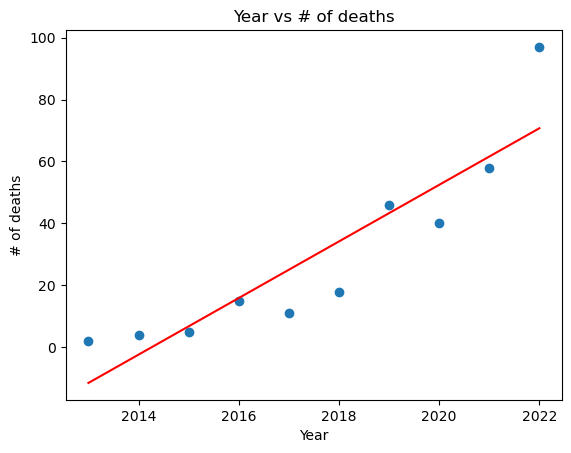

In [33]:
# regresión lineal de muertes por año

def linear(x_values, y_values):
    slope,intercept,rvalue,pvalue,stderr =linregress(x_values,y_values)
    line_eq = f'y = {round(intercept,2)} + {round(slope,2)} X'
    y_predict = intercept + (slope * x_values)
    return line_eq, y_predict

x_values = tesla_data.groupby('Year')[' Deaths '].count().index
y_values = tesla_data.groupby('Year')[' Deaths '].count()
line_eq, y_predict = linear(x_values, y_values)
plt.scatter(x_values, y_values)
plt.plot(x_values, y_predict, color = "r")

plt.ylabel('# of deaths')
plt.xlabel('Year')
plt.title('Year vs # of deaths')

# Show plot
plt.show()


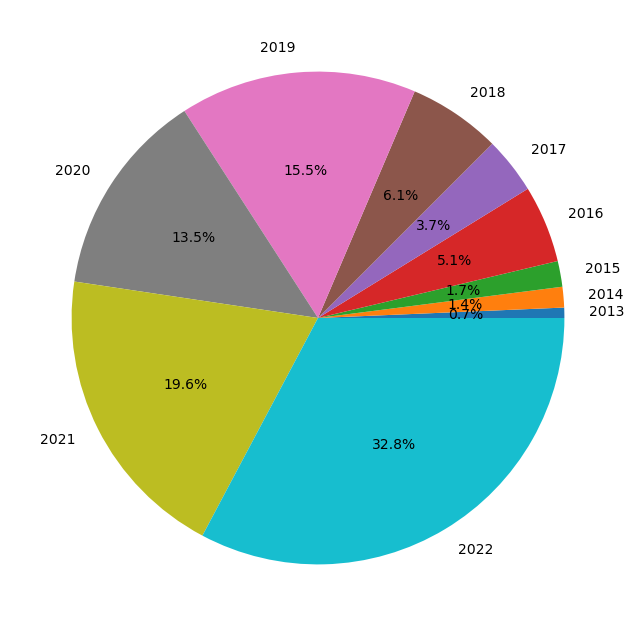

In [34]:
# Pie chart: Deaths by year
plt.figure(figsize = (8, 8))
plt.pie(y_values, labels = x_values,autopct='%1.1f%%')
plt.show()

In [35]:
#Causes that led to more deaths
descr = tesla_data.groupby(' Description ')[' Deaths '].count().sort_values(ascending=False)
descr

 Description 
 Tesla kills pedestrian                          10
 Tesla kills motorcyclist                         6
 Tesla into oncoming traffic                      5
 Tesla rear ends stopped car                      4
 Tesla drives off cliff                           4
                                                 ..
 Single-collision on onramp                       1
 Six vehicle crash                                1
 Sleeping Tesla driver kills motorcyclist         1
 Speeding Tesla crashes into car                  1
 Wrong way driver strikes Tesla, Tesla burns      1
Name:  Deaths , Length: 250, dtype: int64

In [36]:
# Top 5: Causes that led to more deaths
descr_l = descr.iloc[3:]
descr_l.head()

 Description 
 Tesla rear ends stopped car     4
 Tesla drives off cliff          4
 Three car collision             3
 Tesla hits pedestrian           3
 Tesla hits motorcycle           3
Name:  Deaths , dtype: int64

In [37]:
# Top 5: Causes that led to more driver deaths
driver = tesla_data.groupby(' Description ')[' Tesla driver '].count().sort_values(ascending=False)
driver_l = driver.iloc[3:]
driver_d = driver_l.head()
driver_d

 Description 
 Tesla drives off cliff          4
 Tesla rear ends stopped car     4
 Three car collision             3
 Tesla hits pedestrian           3
 Tesla crashes into tree         3
Name:  Tesla driver , dtype: int64

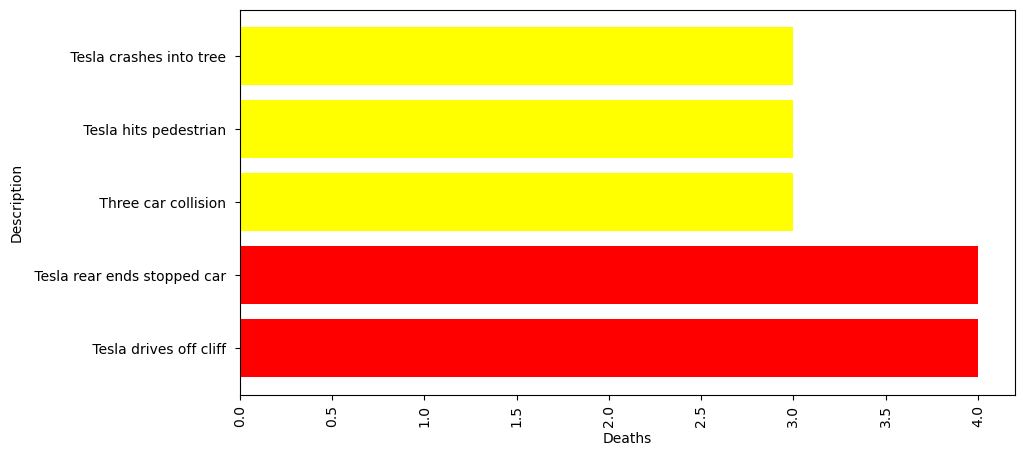

In [45]:
# Bar chart: Causes that led to more driver deaths
plt.figure(figsize=(10,5))
plt.barh(
    driver_d.index,
    driver_d,
    color=[*['red']*2,*['yellow']*3]
)
plt.xticks(rotation=90)
plt.xlabel('Deaths')
plt.ylabel('Description')
plt.show()

In [46]:
# Deaths caused by Tesla autopilot

autopilot_death = tesla_data[' Autopilot claimed ']

print('Number of deaths caused by Tesla autopilot ' 
      + str(tesla_data[' Autopilot claimed '].sum()))

Number of deaths caused by Tesla autopilot 41.0


In [47]:
#Deaths caused by Tesla autopilot per country
autopilot_country = tesla_data.groupby(' Country ')[' Autopilot claimed '].sum().sort_values(ascending=False)

autopilot_country

 Country 
 USA             33.0
 China            2.0
 Germany          2.0
 Holland          1.0
 Japan            1.0
 South Korea      1.0
 Norway           1.0
 Australia        0.0
 Portugal         0.0
 UK               0.0
 Taiwan           0.0
 Switzerland      0.0
 Spain            0.0
 Slovenia         0.0
 Mexico           0.0
 Netherlands      0.0
 Austria          0.0
 France           0.0
 Finland          0.0
 Denmark          0.0
 Canada           0.0
 Belgium          0.0
 Ukraine          0.0
Name:  Autopilot claimed , dtype: float64

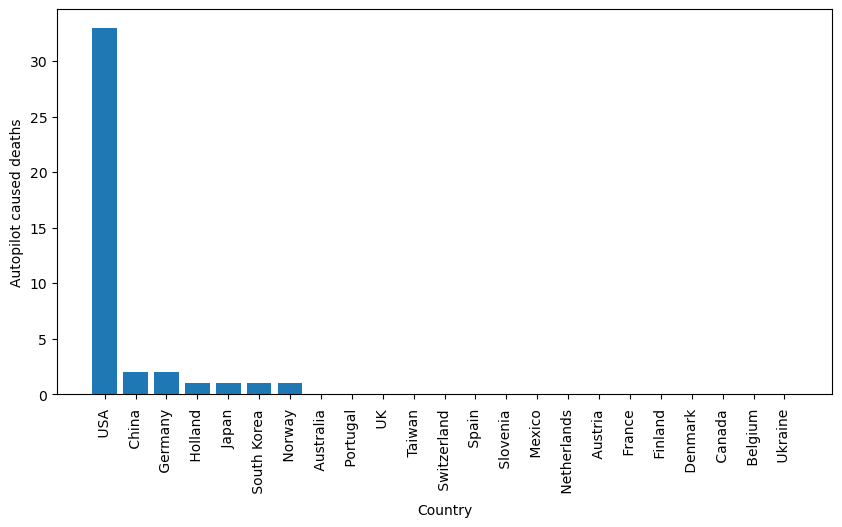

In [48]:
#Deaths caused by Tesla autopilot per country graph

plt.figure(figsize=(10,5))
plt.bar(
    tesla_data.groupby(' Country ')[' Autopilot claimed '].sum().sort_values(ascending=False).index,
    tesla_data.groupby(' Country ')[' Autopilot claimed '].sum().sort_values(ascending=False),

)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Autopilot caused deaths')
plt.show()

In [49]:
#Deaths caused by Tesla autopilot per year

autopilot_year = tesla_data.groupby('Year')[' Autopilot claimed '].sum()
autopilot_year

Year
2013     0.0
2014     0.0
2015     0.0
2016     2.0
2017     0.0
2018     2.0
2019    10.0
2020     8.0
2021     5.0
2022    14.0
Name:  Autopilot claimed , dtype: float64

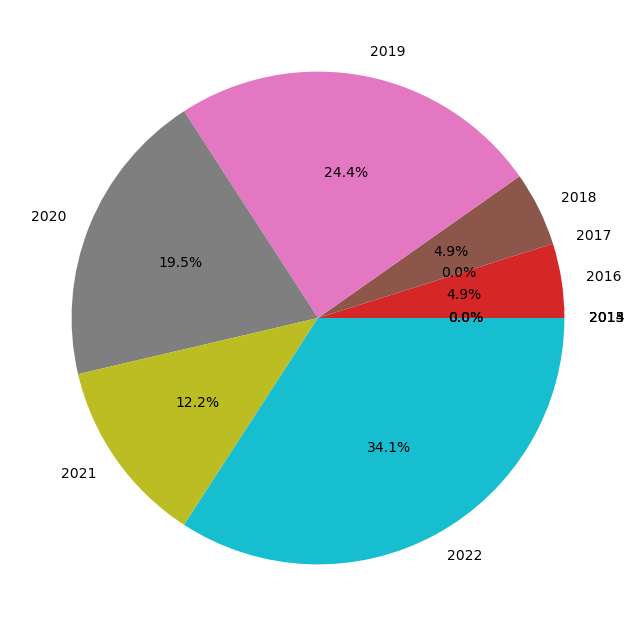

In [50]:
#Deaths caused by Tesla autopilot per year graph

x_values = tesla_data.groupby('Year')[' Autopilot claimed '].sum().index
y_values = tesla_data.groupby('Year')[' Autopilot claimed '].sum()

plt.figure(figsize = (8, 8))
plt.pie(y_values, labels = x_values,autopct='%1.1f%%')
plt.show()

#worth mentioning the decrease in 2020 and 2021 may've been caused by quarantine

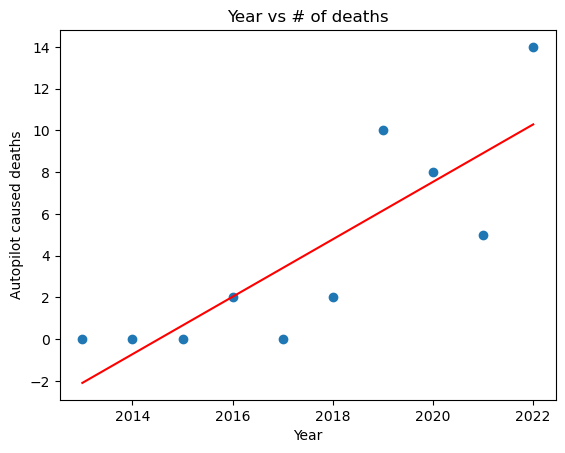

In [51]:
# linear regression of autopilot deaths per year

def linear(x_values, y_values):
    slope,intercept,rvalue,pvalue,stderr =linregress(x_values,y_values)
    line_eq = f'y = {round(intercept,2)} + {round(slope,2)} X'
    y_predict = intercept + (slope * x_values)
    return line_eq, y_predict

x_values = tesla_data.groupby('Year')[' Autopilot claimed '].sum().index
y_values = tesla_data.groupby('Year')[' Autopilot claimed '].sum()
line_eq, y_predict = linear(x_values, y_values)
plt.scatter(x_values, y_values)
plt.plot(x_values, y_predict, color = "r")
plt.annotate(line_eq, (-50,30), color = 'r', fontsize = 15)


plt.ylabel('Autopilot caused deaths')
plt.xlabel('Year')
plt.title('Year vs # of deaths')

# Show plot
plt.show()